In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

# If you are not using Kaggle, you might want to change the directory accordingly
# You can also skip this part if you're not using it to list files
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
# For example, df = pd.read_csv('your_dataset.csv')
# df.head() to see the first few rows of your dataset

# Data preprocessing
# You can add your data preprocessing steps here

# Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
# Choose one of the scaling methods or customize your own
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Model Selection
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier()
}

# Model Evaluation
for name, model in models.items():
    print(f'-- {name} --')
    # Fit the model
    # model.fit(X_train_scaled, y_train)
    # Predictions
    # y_pred = model.predict(X_test_scaled)
    # Evaluation metrics
    # print(classification_report(y_test, y_pred))
    # print(confusion_matrix(y_test, y_pred))

# Visualization
# You can add visualization code here using matplotlib and seaborn

# End of code


/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [3]:
# combining trian and test datasets

df = pd.concat([pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv'),pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')], ignore_index=True)
df.drop('Unnamed: 0',axis=1,inplace=True) # unnecessary column
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Pre-Processing

## Data Cleaning

In [4]:
# Checking Null values
pd.DataFrame(df.isnull().value_counts())

,,,,,,,,,,,,,,,,,,,,,,0
trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1852394


In [5]:
# Binarizing Gender column
def gender_binarizer(x):
    if x=='F':
        return 1
    if x=='M':
        return 0
    
df['gender'] = df['gender'].transform(gender_binarizer)

In [6]:
# Seperating nominal from numeric
# Note:There are almost 2M records in dfz.In order to avoid the heavy calculation,only the first 100000 rows were selected.
df2 = df.loc[:99999,df.dtypes!=np.object]
df2

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,1,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,1,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,0,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,0,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,0,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,2475085306462014,95.14,0,56152,44.2378,-95.2739,1507,1330443409,44.718105,-95.843397,0
99996,4005676619255478,8.75,0,70726,30.4590,-90.9027,71335,1330443447,29.931844,-90.610715,0
99997,3519232971341141,34.20,0,43903,40.4731,-80.9596,2208,1330443454,41.076153,-80.506107,0
99998,4040099974063068803,73.11,0,58769,48.3396,-102.2400,229,1330443491,48.535070,-102.524262,0


## Train Test Split

In [7]:
X = df2.drop(['cc_num','is_fraud'],axis=1)
y = df2['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Resampling via SMOTE

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


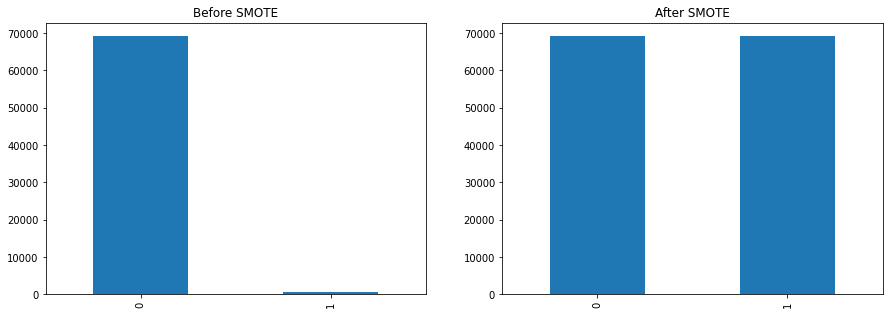

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE to balance the dataset
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

# Visualize the effect of SMOTE on imbalanced datasets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='Set1')
plt.title('Before SMOTE')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_new, palette='Set2')
plt.title('After SMOTE')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [9]:
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

To balance the heavily imbalanced dataset where the fraud transactions (Class = 1) are significantly fewer than the non-fraud transactions (Class = 0), you can use the Synthetic Minority Over-sampling Technique (SMOTE) to increase the number of minority class samples (fraud transactions) to match the number of majority class samples (non-fraud transactions).

## Scaling

### Robust Scaler VS MinMaxScaler VS Standard Scaler

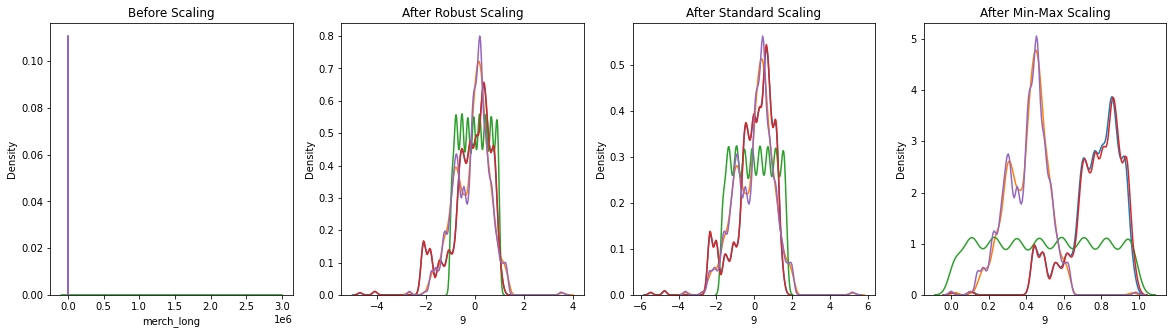

In [10]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Define the scalers
scalers = {
    'Robust Scaling': RobustScaler(),
    'Standard Scaling': StandardScaler(),
    'Min-Max Scaling': MinMaxScaler()
}

# Apply scaling and create DataFrames for each scaled dataset
scaled_dfs = {}
for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(df2)
    scaled_dfs[scaler_name] = pd.DataFrame(scaled_data, columns=df2.columns)

# Using KDE plot
# Note: some columns are opted out in order to speed up the process
fig, axes = plt.subplots(1, len(scalers) + 1, figsize=(25, 5))

# Plot the original data
axes[0].set_title('Before Scaling')
for col in ['merch_long', 'merch_lat', 'city_pop', 'long', 'lat']:
    sns.kdeplot(df2[col], ax=axes[0])

# Plot scaled data for each scaler
for i, (scaler_name, scaled_df) in enumerate(scaled_dfs.items(), 1):
    axes[i].set_title(f'After {scaler_name}')
    for col in ['merch_long', 'merch_lat', 'city_pop', 'long', 'lat']:
        sns.kdeplot(scaled_df[col], ax=axes[i])

plt.show()


Since we have a huge amount of data, its better to normalize the dataset by using RobustScaler which scales the data according to the quantile range.


In [11]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Logistic Regression**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define a function to evaluate the model and print metrics
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model using the defined function
evaluate_model(model, X_test, y_test)


Accuracy: 0.9520
Precision: 0.1470
Recall: 0.7848
F1 Score: 0.2476
Confusion Matrix:
[[28323  1375]
 [   65   237]]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


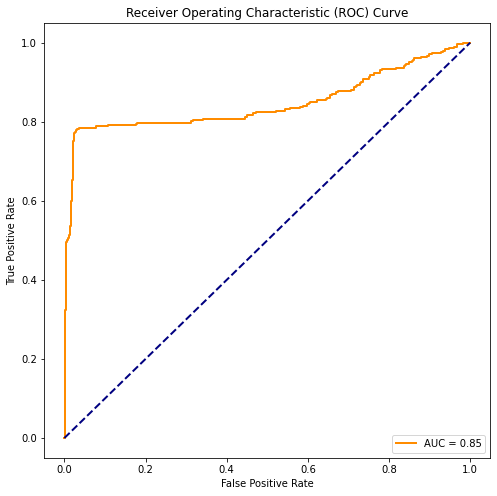

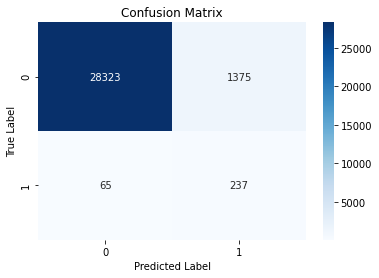

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot Decision Boundary (for two features)
if X_train.shape[1] == 2:
    plt.figure(figsize=(8, 8))
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', marker='o')
    
    h = .02  # step size in the mesh
    x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
    y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.title('Decision Boundary')
    plt.xlabel(X_test.columns[0])
    plt.ylabel(X_test.columns[1])
    plt.show()


## SVM


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'C': uniform(0.1, 10),  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4],  # Degree for 'poly' kernel
}

# Create and train the SVM model using RandomizedSearchCV for hyperparameter tuning
svm_model_random = RandomizedSearchCV(
    estimator=SVC(random_state=42),
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds in cross-validation
    scoring='accuracy',  # Metric used to evaluate the predictions on the test set
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV model
svm_model_random.fit(X_train, y_train)

# Get the best parameters found by RandomizedSearchCV
best_params = svm_model_random.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model found by RandomizedSearchCV
evaluate_model(svm_model_random.best_estimator_, X_test, y_test)


Confusion Matrix (Linear SVM Kernel):
 [[29698     0]
 [  302     0]]
F1 Score (Linear SVM Kernel): 0.0000


ValueError: X.shape[1] = 2 should be equal to 9, the number of features at training time

# KNN

In [12]:
param_grid = {'n_neighbors': range(1,20)}
clf = RandomizedSearchCV(KNeighborsClassifier(), param_grid)
clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)

In [13]:
### Determining the number of neighbors using RandomizedSearchCV
param_grid = {'n_neighbors': range(1,20)}
knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................................n_neighbors=19; total time=   2.8s
[CV 2/5] END .................................n_neighbors=19; total time=   3.1s
[CV 3/5] END .................................n_neighbors=19; total time=   2.9s
[CV 4/5] END .................................n_neighbors=19; total time=   3.0s
[CV 5/5] END .................................n_neighbors=19; total time=   3.0s
[CV 1/5] END .................................n_neighbors=10; total time=   2.5s
[CV 2/5] END .................................n_neighbors=10; total time=   2.5s
[CV 3/5] END .................................n_neighbors=10; total time=   2.4s
[CV 4/5] END .................................n_neighbors=10; total time=   2.6s
[CV 5/5] END .................................n_neighbors=10; total time=   2.5s
[CV 1/5] END .................................n_neighbors=14; total time=   2.7s
[CV 2/5] END .................................n_

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 20)},
                   verbose=3)

In [14]:
knn.best_params_ # best parameter

{'n_neighbors': 2}

In [15]:
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[29382   316]
 [   31   271]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29698
           1       0.46      0.90      0.61       302

    accuracy                           0.99     30000
   macro avg       0.73      0.94      0.80     30000
weighted avg       0.99      0.99      0.99     30000



#### AUC KNN

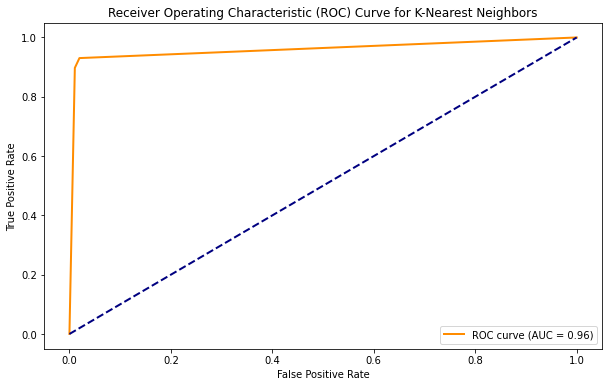

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate AUC
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()


#### Confusion Matrix KNN:

<Figure size 576x432 with 0 Axes>

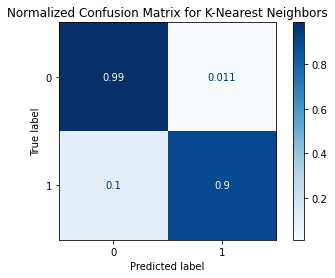

In [18]:
from sklearn.metrics import plot_confusion_matrix

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.title('Normalized Confusion Matrix for K-Nearest Neighbors')
plt.show()


#### F1 Score KNN

In [19]:
from sklearn.metrics import f1_score

# Calculate and Print F1 Score
f1 = f1_score(y_test, knn_pred)
print('F1 Score for K-Nearest Neighbors:', f1)


F1 Score for K-Nearest Neighbors: 0.609673790776153


# Gaussian Naive Bayes

In [20]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

print(confusion_matrix(y_test,gnb_pred))
print('\n')
print(classification_report(y_test,gnb_pred))

[[28378  1320]
 [   97   205]]


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     29698
           1       0.13      0.68      0.22       302

    accuracy                           0.95     30000
   macro avg       0.57      0.82      0.60     30000
weighted avg       0.99      0.95      0.97     30000



#### AUC Curve Gaussian Naive Bayes

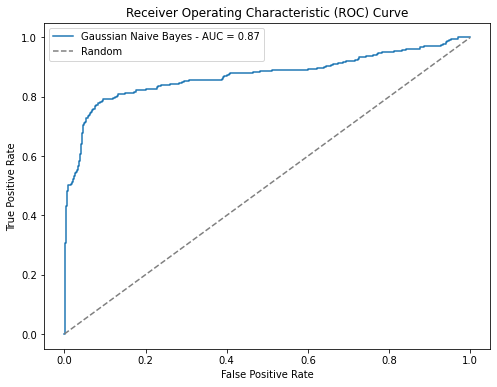

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

gnb_probs = gnb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, gnb_probs)
fpr, tpr, thresholds = roc_curve(y_test, gnb_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gaussian Naive Bayes - AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Confusion Matrix Gaussian Naive Bayes

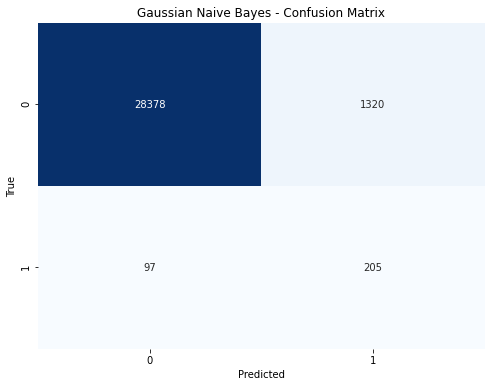

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

gnb_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, gnb_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gaussian Naive Bayes - Confusion Matrix')
plt.show()


#### F1 Score Gaussian Naive Bayes

In [23]:
from sklearn.metrics import f1_score

gnb_pred = gnb.predict(X_test)
f1 = f1_score(y_test, gnb_pred)
print(f'Gaussian Naive Bayes - F1 Score: {f1:.2f}')

Gaussian Naive Bayes - F1 Score: 0.22


#### Decision Boundary Visualization Gaussian Naive Bayes

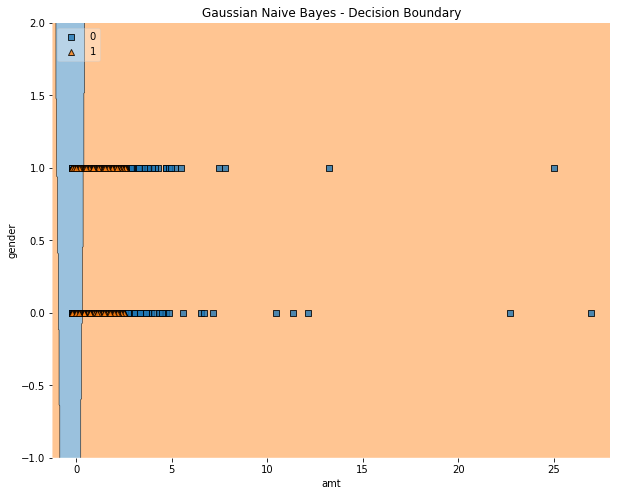

In [24]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

feature1_index = 0  # Replace with the index of the first feature
feature2_index = 1  # Replace with the index of the second feature

X_train_subset = X_train[:, [feature1_index, feature2_index]]
gnb.fit(X_train_subset, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train_subset, y_train, clf=gnb, legend=2)
plt.xlabel(X.columns[feature1_index])
plt.ylabel(X.columns[feature2_index])
plt.title('Gaussian Naive Bayes - Decision Boundary')
plt.show()

# Decision Tree

In [25]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[29023   675]
 [   59   243]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29698
           1       0.26      0.80      0.40       302

    accuracy                           0.98     30000
   macro avg       0.63      0.89      0.69     30000
weighted avg       0.99      0.98      0.98     30000



#### AUC Curve Decision Tree

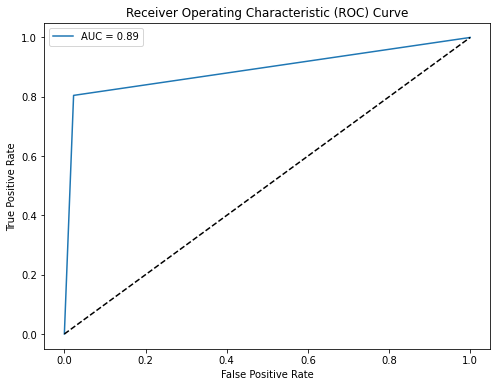

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

dtree_prob = dtree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, dtree_prob)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


#### Confusion Matrix Decision Tree


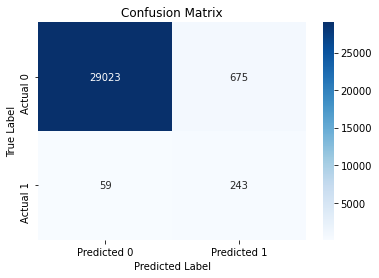

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, dtree_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### F1 Score Decision Tree


In [28]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, dtree_pred)
print(f'F1 Score: {f1:.2f}')


F1 Score: 0.40


#### Decision boundary Decision Tree


In [30]:
# Assuming X has two features for simplicity
num_features = X_test.shape[1]

if num_features == 2:
    feature1_values = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
    feature2_values = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)

    xx, yy = np.meshgrid(feature1_values, feature2_values)
    Z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=dtree_pred, cmap='viridis', edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Tree - Decision Boundary')
    plt.show()
else:
    print(f"Decision boundary visualization supports 2 features only. Your model has {num_features} features.")

Decision boundary visualization supports 2 features only. Your model has 9 features.


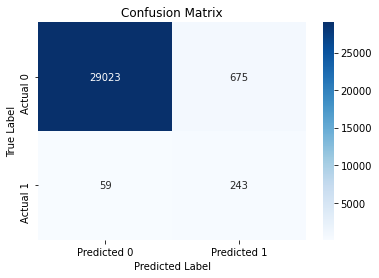

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = [[29023, 675], [59, 243]]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


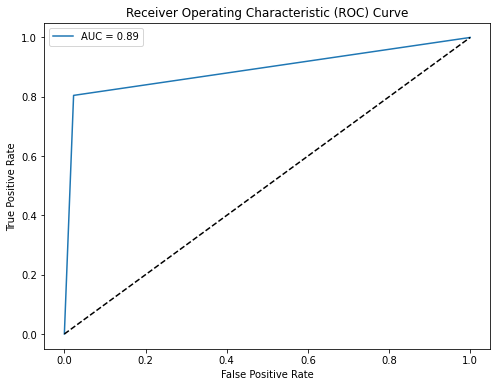

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming dtree_prob is the predicted probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, dtree_prob)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Random Forest

In [33]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[29464   234]
 [   37   265]]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     29698
           1       0.53      0.88      0.66       302

    accuracy                           0.99     30000
   macro avg       0.76      0.93      0.83     30000
weighted avg       0.99      0.99      0.99     30000



Random Forest - Confusion Matrix:
[[29668    30]
 [  109   193]]


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29698
           1       0.87      0.64      0.74       302

    accuracy                           1.00     30000
   macro avg       0.93      0.82      0.87     30000
weighted avg       1.00      1.00      1.00     30000





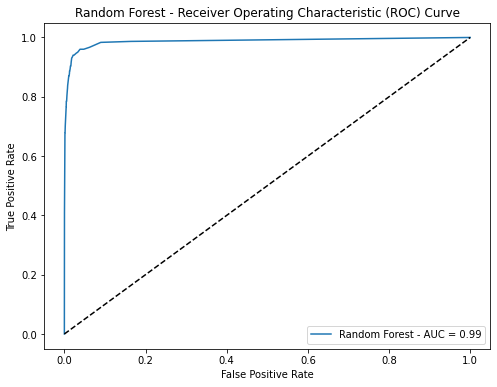

Random Forest - F1 Score: 0.7352380952380951


In [37]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rfc_pred)
print("Random Forest - Confusion Matrix:")
print(conf_matrix)
print("\n")

# Classification Report
class_report = classification_report(y_test, rfc_pred)
print("Random Forest - Classification Report:")
print(class_report)
print("\n")

# AUC Curve
auc_score = roc_auc_score(y_test, rfc_proba)
fpr, tpr, _ = roc_curve(y_test, rfc_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest - AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# F1 Score
f1 = f1_score(y_test, rfc_pred)
print("Random Forest - F1 Score:", f1)


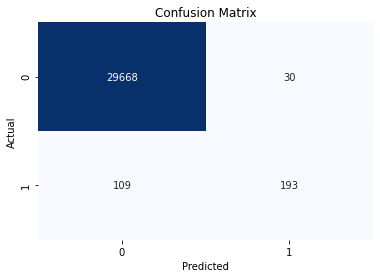

In [38]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rfc_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AdaBoost

In [40]:
adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adabc.fit(X_train,y_train)
adabc_pred = adabc.predict(X_test)

print(confusion_matrix(y_test,adabc_pred))
print('\n')
print(classification_report(y_test,adabc_pred))

[[29652    46]
 [  157   145]]


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     29698
           1       0.76      0.48      0.59       302

    accuracy                           0.99     30000
   macro avg       0.88      0.74      0.79     30000
weighted avg       0.99      0.99      0.99     30000



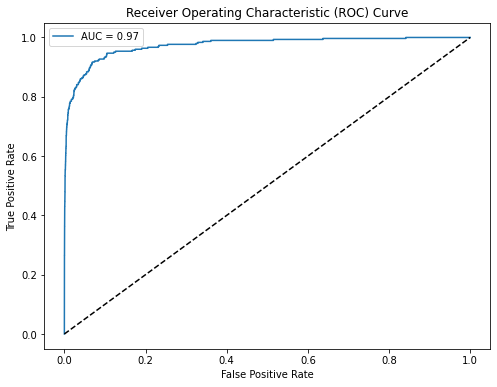

In [41]:
# AUC curve
adabc_probs = adabc.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, adabc_probs)
fpr, tpr, thresholds = roc_curve(y_test, adabc_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

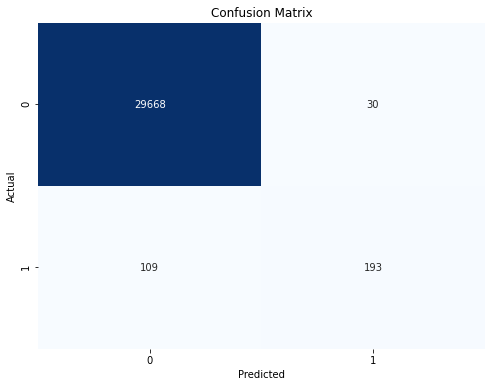

In [42]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
# Decision Boundary (for 2D data only)
if X_train.shape[1] == 2:
    h = .02  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = adabc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', s=100)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
else:
    print("Decision Boundary plotting is supported only for 2D data.")

Decision Boundary plotting is supported only for 2D data.


In [44]:
# F1 Score
f1 = f1_score(y_test, adabc_pred)
print(f"F1 Score: {f1:.2f}")
print('\n')

F1 Score: 0.59




# Bagging

In [45]:
bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=200)
bgc.fit(X_train,y_train)
bgc_pred = bgc.predict(X_test)

print(confusion_matrix(y_test,bgc_pred))
print('\n')
print(classification_report(y_test,bgc_pred))

[[29647    51]
 [  127   175]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29698
           1       0.77      0.58      0.66       302

    accuracy                           0.99     30000
   macro avg       0.89      0.79      0.83     30000
weighted avg       0.99      0.99      0.99     30000



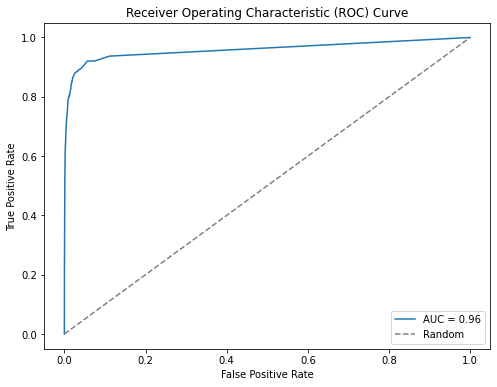

In [46]:
# AUC Curve
bgc_proba = bgc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, bgc_proba)
fpr, tpr, thresholds = roc_curve(y_test, bgc_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [47]:
# Decision Boundary (For 2D data only)
if X_train.shape[1] == 2:
    h = .02  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = bgc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=bgc_pred, edgecolors='k', marker='o', s=100, linewidth=1)
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

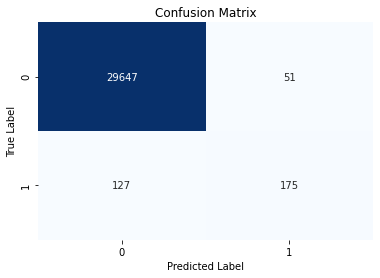

In [48]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, bgc_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# F1 Score
f1 = f1_score(y_test, bgc_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.66


In [56]:
# Access AUC values for each classifier
for classifier_name, auc_value in result_table['auc'].items():
    print(f"AUC for {classifier_name}: {auc_value}")


AUC for GaussianNB: 0.8572708087016362
AUC for KNeighborsClassifier: 0.7563007899834047
AUC for DecisionTreeClassifier: 0.795235280186995
AUC for RandomForestClassifier: 0.9839512460758391
AUC for AdaBoostClassifier: 0.9639836272338004
AUC for BaggingClassifier: 0.9152728526772156
